In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.dummy import DummyRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.ensemble import RandomForestRegressor

from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor




In [4]:
df = pd.read_csv('df.csv')
df.head()

,brand,flavour,volume_per_joghurt_g,packsize,product_id,Unnamed: 0,date,price,units,weekday,weight
0,Mueller,blueberry,150,6,0,0,2020-01-01,4.65,1126.0,Wednesday,1013400.0
1,Mueller,blueberry,150,6,0,1,2020-01-02,4.76,1205.0,Thursday,1084500.0
2,Mueller,blueberry,150,6,0,2,2020-01-03,5.22,1007.0,Friday,906300.0
3,Mueller,blueberry,150,6,0,3,2020-01-04,5.45,1282.0,Saturday,1153800.0
4,Mueller,blueberry,150,6,0,4,2020-01-05,3.33,1037.0,Sunday,933300.0


In [5]:
class random_forest():

    def __init__(self):
        self.reg = None

    def pred(self, x):
        if self.reg is None:
            raise ValueError("train the model first")
        else:
            self.reg.predict(x)
        return self.reg.predict(x)

    def random_forest_on_units(self, x):

        #def y
        y = df[['units']]


        #skip standardization bcs it's unnecessary for tree based models
        #test train split
        X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

        #fit model
        self.reg  = RandomForestRegressor(n_estimators=100, random_state=42)
        self.reg.fit(X_train, y_train)

        preds = self.reg.predict(X_test)

        mse = mean_squared_error(y_test, preds)
        r2 = r2_score(y_test, preds)

        


        print(f"MSE: {mse:.3f}\n")
        print(f"R^2: {r2:.3f}\n")
        print(f"accuracy: {self.reg.score(X_test, y_test):.3f}\n")
        print(self.reg.feature_importances_)





In [6]:
x1 = df[['price']]
y = df[['units']]

In [7]:
rf_x1 = random_forest()
rf_x1.random_forest_on_units(x1)

c:\Users\test\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


MSE: 135833.616

R^2: 0.307

accuracy: 0.307

[1.]


In [8]:
x2 = df[['brand', 'flavour', 'volume_per_joghurt_g', 'packsize', 'price']]
x3 = df[['brand', 'flavour',  'price']]

dummy_df = pd.get_dummies(x3, columns=['brand', 'flavour'], drop_first=True)

In [9]:
rf_xn = random_forest()
rf_xn.random_forest_on_units(dummy_df)


c:\Users\test\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


MSE: 41938.957

R^2: 0.786

accuracy: 0.786

[0.75513195 0.02226854 0.0085416  0.00991372 0.00610091 0.00729324
 0.03298408 0.01183795 0.01014182 0.05367989 0.00748972 0.06415384
 0.01046274]


In [68]:

class gradient_boosting():

    def __init__(self):
        self.reg = None

    def pred(self, x):
        if self.reg is None:
            raise ValueError("train the model first")
        else:
            self.reg.predict(x)
        return self.reg.predict(x)

    def gradient_boosting_on_units(self, x):

        #def y
        y = df[['units']]


        #skip standardization bcs it's unnecessary for tree based models
        #test train split
        X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

        #fit model
        self.reg = GradientBoostingRegressor(n_estimators=500, max_depth=1, learning_rate=0.1, random_state=42)
        self.reg.fit(X_train, y_train)


        preds = self.reg.predict(X_test)

        mse = mean_squared_error(y_test, preds)
        r2 = r2_score(y_test, preds)

        



        print(f"MSE: {mse:.3f}\n")
        print(f"R^2: {r2:.3f}\n")
        print(f"accuracy: {self.reg.score(X_test, y_test):.3f}\n")
        print(self.reg.feature_importances_)






In [11]:
gb_x1 = gradient_boosting()
gb_x1.gradient_boosting_on_units(x1)

MSE: 114888.706

R^2: 0.414

accuracy: 0.414

[1.]


c:\Users\test\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


In [69]:
gb_xn = gradient_boosting()
gb_xn.gradient_boosting_on_units(dummy_df)


c:\Users\test\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


MSE: 50035.875

R^2: 0.745

accuracy: 0.745

[7.87636689e-01 1.74807082e-02 1.63466862e-03 0.00000000e+00
 7.08572682e-04 0.00000000e+00 8.95358133e-04 0.00000000e+00
 7.88564037e-03 8.95435333e-02 1.57521730e-02 7.84626569e-02
 0.00000000e+00]



### tuning gradient boosting tree


In [ ]:

X_train, X_test, y_train, y_test = train_test_split(dummy_df, df[['units']], test_size=0.2, random_state=42)


c:\Users\test\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
c:\Users\test\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
c:\Users\test\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


<Axes: >

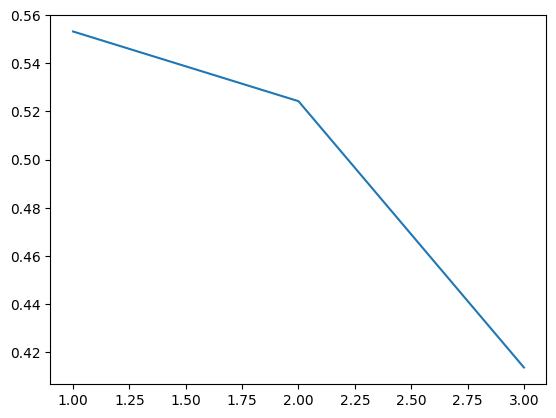

In [31]:
accuracy = []
test_num = 3
for i in range(test_num):
    gb = GradientBoostingRegressor(max_depth=i + 1).fit(X_train, y_train) 
    y_pred = gb.predict(X_test)
    accuracy.append(gb.score(X_test, y_test))

sns.lineplot(x=range(1, test_num + 1), y=accuracy)


<Axes: >

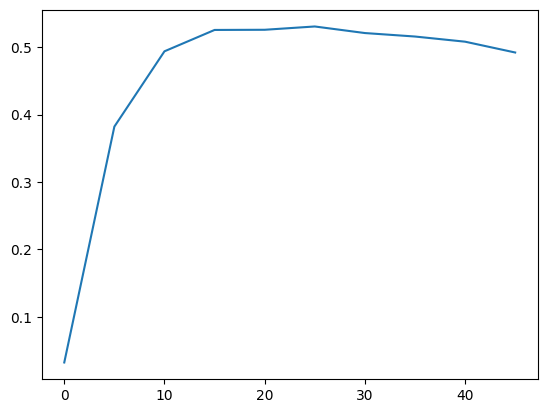

In [ ]:
accuracy = []
test_num = 50
step = 5

for i in range(0, test_num, step):
    gb = GradientBoostingRegressor(n_estimators=i + 1).fit(X_train, y_train) 
    y_pred = gb.predict(X_test)
    accuracy.append(gb.score(X_test, y_test))

sns.lineplot(x=range(0, test_num, step), y=accuracy)





c:\Users\test\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
c:\Users\test\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
c:\Users\test\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
c:\Users\test\AppData\Local\Pro

<Axes: >

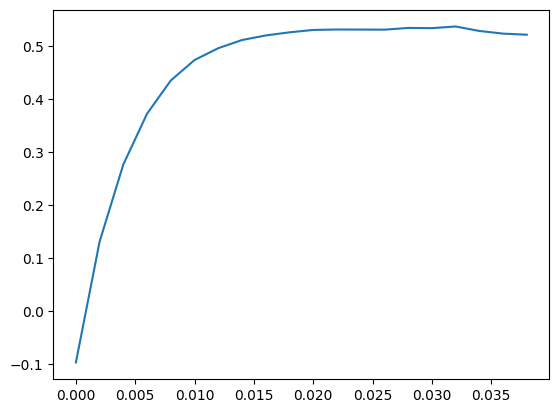

In [53]:
accuracy = []
test_num = 20
deno = 500

for i in range(0, test_num):
    gb = GradientBoostingRegressor(learning_rate=i/deno).fit(X_train, y_train) 
    y_pred = gb.predict(X_test)
    accuracy.append(gb.score(X_test, y_test))

sns.lineplot(x=map(lambda x: x/deno, range(0, test_num))
                , y=accuracy)



looks like n estimator and learning rate reach plateau after a while 
### to do
- interaction between parameters
- how does pro do

In [22]:

class decision_tree():

    def __init__(self):
        self.reg = None

    def pred(self, x):
        if self.reg is None:
            raise ValueError("train the model first")
        else:
            self.reg.predict(x)
        return self.reg.predict(x)

    def decision_tree_on_units(self, x):

        #def y
        y = df[['units']]


        #skip standardization bcs it's unnecessary for tree based models
        #test train split
        X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

        #fit model
        self.reg = DecisionTreeRegressor(max_depth=2, random_state=42)
        self.reg.fit(X_train, y_train)


        preds = self.reg.predict(X_test)

        mse = mean_squared_error(y_test, preds)
        r2 = r2_score(y_test, preds)

        


        print(f"MSE: {mse:.3f}\n")
        print(f"R^2: {r2:.3f}\n")
        print(f"accuracy: {self.reg.score(X_test, y_test):.3f}\n")
        print(self.reg.feature_importances_)







In [13]:
tree_x1 = decision_tree()
tree_x1.decision_tree_on_units(x1)

MSE: 84074.664

R^2: 0.571

[1.]


In [14]:
tree_xn = decision_tree()
tree_xn.decision_tree_on_units(dummy_df)

MSE: 71943.707

R^2: 0.633

[0.91537258 0.         0.         0.         0.         0.
 0.08462742 0.         0.         0.         0.         0.
 0.        ]


### price optimization

In [16]:
def generate_price_data(brand, flavour, price_range, df):


# simulation of price data for Müller and chocolate flavor
    base_case = df.min().copy()
    base_case[brand] = 1
    base_case[flavour] = 1

    price_list = []

    for price in price_range:
        row = base_case.copy()
        row['price'] = price
        price_list.append(row)



    return pd.DataFrame(price_list)
price_df = generate_price_data("brand_Mueller", "flavour_chocolate", np.linspace(1, 10, 100), dummy_df)

       price  brand_Activia  brand_Alnatura  brand_Danone  \
87  8.909091          False           False         False   

    brand_Ecke-Mit-Was-Drin  brand_Ja!  brand_Mueller  brand_Oikos  \
87                    False      False              1        False   

    brand_Rewe  flavour_chocolate  flavour_raspberry  flavour_straciatella  \
87       False                  1              False                 False   

    flavour_strawberry  pred_unit       revenue  
87               False    1146.16  10211.243636  


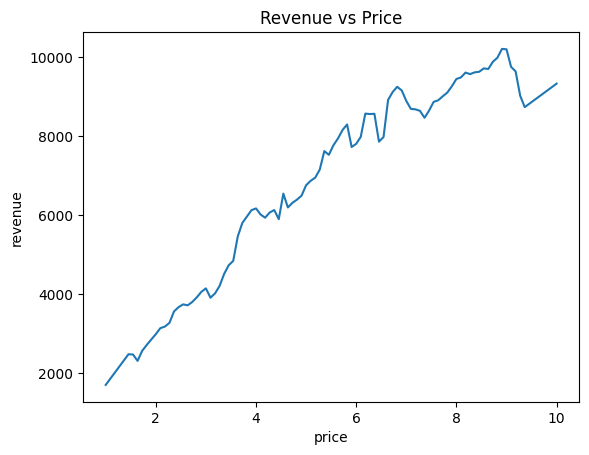

In [17]:
def revenue_optimize(price_df, model):
    revenue_df = price_df.copy()
    revenue_df['pred_unit'] = model.pred(price_df)
    revenue_df["revenue"] = revenue_df['pred_unit'] * revenue_df['price']
    print(revenue_df.query('revenue == revenue.max()'))
    sns.lineplot(data=revenue_df, x='price', y='revenue')
    plt.title("Revenue vs Price")
revenue_optimize(price_df, rf_xn)

# model comparison for this dataset

### OLS

- linearity v
- endogeneity: can only assume Omitted variables/Simultaneity/Measurement error/ Sample selection bias doesn't exist
- normality and homoscedasticity of residual v
- autocorrelation: if the data are collected from different customers then it's safe otherwise this would lead to underestimate of std
- multicolinearity: price has a high VIF, which leads to inflated standard errors and biased estimation. since we are mainly looking at the effect of price affecting sales, 'volume_per_joghurt_g' and 'packsize' are dropped to increase the price precission even though it decrease adj r squared



### model: random forest

- n_estimators= 100 is the default value to balance of performance and speed A
- Independence of Observations: if the data is not collected from different customer this may lead to overfitting or misleading variable importance. Tree-based methods do not inherently account for autocorrelation... Time-series structure must be explicitly encoded via lag features or temporal validation
- minimal multicollinearity: may split on redundant variables/ misleading importance rankings. Random Forest is not affected by multicollinearity as much as linear regression... though variable importance can be biased.

- however the above 2 problems also affect linear model, and random forest is more robust to them in general. 

### comparing random forest and OLS

- Cross-validation and scoring metrics like MSE or R² can be used to compare the generalization performance of multiple estimators.
- Adjusted R² is not well defined for non-parametric models like Random Forests.
- Standardizing the target variable allows MSE to be interpreted in terms of variance units, but it is no longer in the original units of measurement, making direct interpretability more difficult.
- R² depends only on the squared errors and the total variance, and both scale in the same way under standardization, R² remains unchanged

### other alternatives

- **gradient boosting tree regresssion :**

    potentoal of higher accuracy than random forest, but requires more tuning and is more prone to overfitting

- **GLM :** generalizes OLS by allowing for non-normal dependent variables (e.g., logistic regression, Poisson regression). It is best when the data type itself is different—like counts or proportions.
    - Linearity 
    - No Endogeneity 
    - No Multicollinearity 
    - No Autocorrelation

    specific to GLM compared to OLS:
    - Correct Specification of the Link Functio
    - Correct Specification of the Distribution of the Response Variable (exponential family e.g., Normal, Binomial, Poisson, Gamma, Inverse Gaussian)
    - Some GLMs require handling of an extra dispersion parameter (e.g., in Gamma or quasi-Poisson models).

    difference from OLS, GLM can better handle the below assumptions, but we don't have to worry about them here:
    - Normality and Homoscedasticity of Residuals
        - Normality: GLM assumes that the response variable follows a distribution from the exponential family
        - Homoscedasticity : GLM allows the variance to be a function of the mean, depending on the family 

- **GLS :**  generalizes OLS by relaxing the assumption of homoscedasticity and uncorrelated errors. It is used when the dependent variable is continuous and normally distributed, but errors are problematic (e.g., heteroscedastic or autocorrelated)   
    - Linearity 
    - No Endogeneity 
    - No Multicollinearity 

    specific to GLS compared to OLS:
    - Known or Correctly Specified Error Variance-Covariance Matrix (Ω)
        - use GLS If Ω is known
        - use Feasible GLS if Ω must be estimated

    difference from OLS, GLS can better handle the below assumptions, but we don't have to worry about them here:
    - Normality and Homoscedasticity of Residuals
        - Normality: Not necessary for unbiasedness/consistency, only for inference
        - Homoscedasticity : GLS is used precisely when heteroscedasticity is present
    - No Autocorrelation : GLS is often employed specifically to address autocorrelation 

- **GAM :** Generalized Additive Models 
    - No Endogeneity 
    - No Multicollinearity 
    - No Autocorrelation	

    specific to GAM compared to OLS:
    - Smoothness Selection & Overfitting Control: GAMs require selecting the degree of smoothness for each function (e.g., via penalized likelihood)
    - Basis Function Specification: GAM is sensitive to the choice and number of basis functions used to represent smooth terms.
    - Additivity: GAM assumes that effects of predictors are additive, unless interactions are explicitly modeled.



    difference from OLS, GAM can better handle the below assumptions:
     - Linearity: Predictors are allowed to have non-linear relationships with the response via smooth functions (e.g., splines). 
    - Normality and Homoscedasticity of Residuals
        - Normality: Required only if using Gaussian family, not required for all GAMs (GAMs can use Poisson, binomial, etc.)
        - Homoscedasticity: Assumes variance is correctly modeled via the distribution in the specified family; for Gaussian GAMs, this implies constant variance unless otherwise modeled

    here maybe GAM can fit a better line than OLS, but the difference can't be too drastic based on the graph
